In [1]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 26.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 13.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=6894513bc153841d15c1a82280ba7d0d984f9ad5255b00097141c6c35eeb9dbe
  Stored in directory: /home/gputest/.cache/pip/wheels/16/a2/b6/582cfdfbeeccd469504a01af3bb952fd9e7eccba40995eafea
Successfully built autograd-gamma
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter

In [42]:
metadata = pd.read_csv('TCGA.HNSC.metadata.txt', sep='\t', header=0, index_col=[0,1])
metadata.head()


,,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,histological_type,histological_grade,tumor_status,vital_status,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
patient_id,type,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J,HNSC,66.0,MALE,BLACK OR AFRICAN AMERICAN,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,TUMOR FREE,Alive,0.0,102.0,0.0,102.0,NaN,NaN,0.0,102.0,NaN
TCGA-BA-4074,HNSC,69.0,MALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G3,WITH TUMOR,Dead,1.0,462.0,1.0,462.0,NaN,NaN,1.0,396.0,NaN
TCGA-BA-4075,HNSC,49.0,MALE,BLACK OR AFRICAN AMERICAN,Stage III,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,283.0,1.0,283.0,NaN,NaN,1.0,236.0,NaN
TCGA-BA-4076,HNSC,39.0,MALE,WHITE,[Not Available],Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,415.0,1.0,415.0,NaN,NaN,1.0,286.0,NaN
TCGA-BA-4077,HNSC,45.0,FEMALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,1134.0,1.0,1134.0,NaN,NaN,1.0,1134.0,NaN


In [43]:
# For overall survival analysis
time_column = 'OS.time'
event_column = 'OS'

# For disease-specific survival analysis
# time_column = 'DSS.time'
# event_column = 'DSS'

survival_data = metadata[[time_column, event_column]]


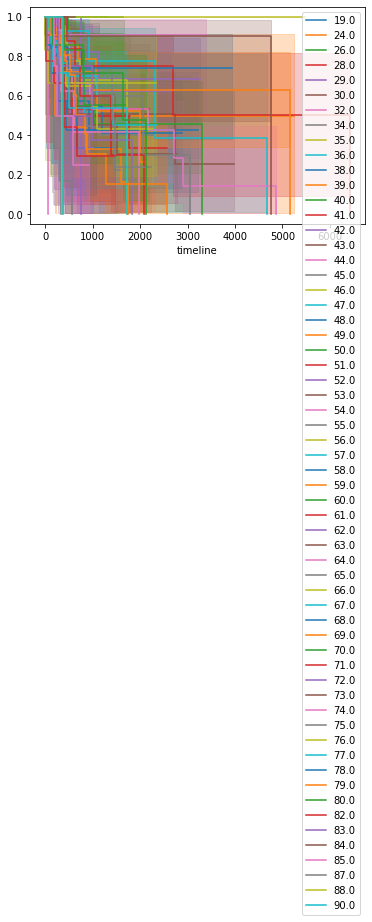

In [9]:
kmf = KaplanMeierFitter()

# Stratify the analysis by tumor status
strata = metadata['age_at_initial_pathologic_diagnosis']

for group in np.unique(strata):
    group_data = survival_data[strata == group]
    kmf.fit(group_data[time_column], group_data[event_column], label=group)
    kmf.plot()


ValueError: Values must be numeric: no strings, datetimes, objects, etc.

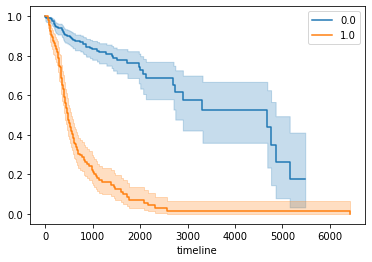

In [27]:
metadata['tumor_status_encoded'] = metadata['tumor_status'].map({'TUMOR FREE': 0, 'WITH TUMOR': 1})
kmf = KaplanMeierFitter()

# Stratify the analysis by tumor status
strata = metadata['tumor_status_encoded']

for group in np.unique(strata):
    group_data = survival_data[strata == group]
    kmf.fit(group_data[time_column], group_data[event_column], label=group)
    kmf.plot()


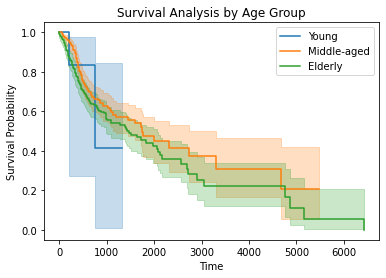

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Define age groups
age_groups = [
    {'name': 'Young', 'min_age': 0, 'max_age': 30},
    {'name': 'Middle-aged', 'min_age': 31, 'max_age': 60},
    {'name': 'Elderly', 'min_age': 61, 'max_age': 100}
]

# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# Create separate plots for each age group
for group in age_groups:
    # Filter metadata based on age group
    filtered_metadata = metadata[(metadata['age_at_initial_pathologic_diagnosis'] >= group['min_age']) & (metadata['age_at_initial_pathologic_diagnosis'] <= group['max_age'])]
    
    # Fit Kaplan-Meier survival curve
    kmf.fit(filtered_metadata['OS.time'], filtered_metadata['OS'], label=group['name'])
    
    # Plot survival curve
    kmf.plot()

# Add legend and labels to the plot
plt.legend()
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Survival Analysis by Age Group')

# Show the plot
plt.show()


In [31]:
from lifelines import KaplanMeierFitter
import pandas as pd

# Drop rows with missing values
metadata_clean = metadata.dropna(subset=['DSS.time', 'DSS'])

# Create a Kaplan-Meier fitter object
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier estimator
kmf.fit(metadata_clean['DSS.time'], event_observed=metadata_clean['DSS'])

# Get the survival probability estimates
survival_prob = kmf.survival_function_



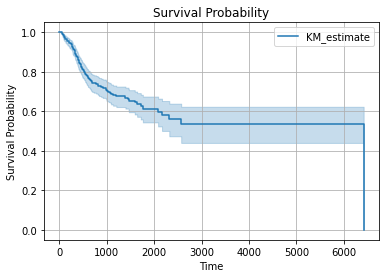

In [30]:
import matplotlib.pyplot as plt

# Plot the survival probability
kmf.plot()

# Customize the plot
plt.title('Survival Probability')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.grid(True)

# Show the plot
plt.show()


In [32]:
from lifelines import KaplanMeierFitter
import pandas as pd

# Drop rows with missing values
metadata_clean = metadata.dropna(subset=['OS.time', 'OS'])

# Create a Kaplan-Meier fitter object
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier estimator
kmf.fit(metadata_clean['OS.time'], event_observed=metadata_clean['OS'])

# Get the survival probability estimates
survival_prob = kmf.survival_function_

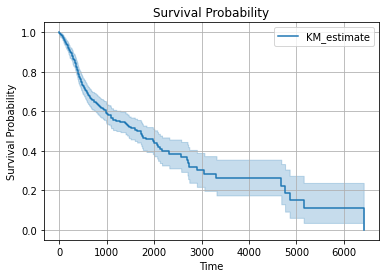

In [33]:
import matplotlib.pyplot as plt

# Plot the survival probability
kmf.plot()

# Customize the plot
plt.title('Survival Probability')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.grid(True)

# Show the plot
plt.show()


In [34]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

group1 = metadata[metadata['tumor_status'] == 'TUMOR FREE']
group2 = metadata[metadata['tumor_status'] == 'WITH TUMOR']
time = metadata['DSS.time']
event = metadata['DSS']
# Perform the log-rank test
results = logrank_test(time[group1.index], time[group2.index], event[group1.index], event[group2.index])
results.print_summary()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         409.55 <0.005    300.10

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                         test_statistic      p  -log2(p)
Stage I   Stage II                 0.17   0.68      0.57
          Stage III                0.77   0.38      1.39
          Stage IVA                3.26   0.07      3.82
          Stage IVB                9.02 <0.005      8.55
          Stage IVC               25.00 <0.005     20.73
          [Discrepancy]            0.19   0.66      0.60
Stage II  Stage III                0.38   0.54      0.89
          Stage IVA                6.03   0.01      6.16
          Stage IVB               13.25 <0.005     11.84
          Stage IVC               29.48 <0.005     24.07
          [Discrepancy]            0.02   0.90      0.16
Stage III Stage IVA                3.03   0.08      3.61
          Stage IVB               10.11 <0.005      9.41
          Stage IVC               72.00 <0.005     55.37
          [Discrepancy]            0.00   0.97      0.05
Stage IVA Stage IVB                4.74   0.03      5.09
          Stage IVC               12.80 <0.005     11.50
          [Discrepancy]            0.21   0.65      0.62
Stage IVB Stage IVC                4.01   0.05      4.47
          [Discrepancy]            2.72   0.10      3.34
Stage IVC [Discrepancy]            3.00   0.08      3.59

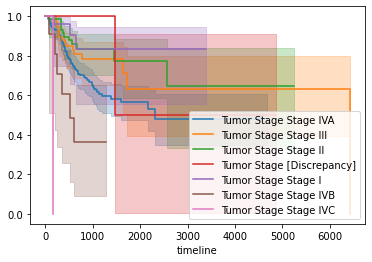

In [45]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import pairwise_logrank_test
tumor_stage = metadata['ajcc_pathologic_tumor_stage']
time = metadata['DSS.time']
event = metadata['DSS']
# Perform the log-rank test
for stage in tumor_stage.unique():
    group = metadata[tumor_stage == stage]
    kmf.fit(time[group.index], event[group.index], label=f'Tumor Stage {stage}')
    kmf.plot()

# Perform pairwise log-rank tests
results = pairwise_logrank_test(time, tumor_stage, event)
results.print_summary()

In [44]:
metadata = metadata[metadata['ajcc_pathologic_tumor_stage'] != '[Not Available]']
metadata = metadata.dropna(how='all')
columns_to_drop = ['DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction']
metadata = metadata.drop(columns=columns_to_drop)
metadata = metadata.dropna()
metadata

,,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,histological_type,histological_grade,tumor_status,vital_status,OS,OS.time,DSS,DSS.time
patient_id,type,,,,,,,,,,,,
TCGA-4P-AA8J,HNSC,66.0,MALE,BLACK OR AFRICAN AMERICAN,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,TUMOR FREE,Alive,0.0,102.0,0.0,102.0
TCGA-BA-4074,HNSC,69.0,MALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G3,WITH TUMOR,Dead,1.0,462.0,1.0,462.0
TCGA-BA-4075,HNSC,49.0,MALE,BLACK OR AFRICAN AMERICAN,Stage III,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,283.0,1.0,283.0
TCGA-BA-4077,HNSC,45.0,FEMALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,1134.0,1.0,1134.0
TCGA-BA-5149,HNSC,47.0,MALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,806.0,1.0,806.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UF-A7JO,HNSC,79.0,FEMALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,631.0,1.0,631.0
TCGA-UF-A7JS,HNSC,59.0,MALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,680.0,1.0,680.0
TCGA-UF-A7JT,HNSC,72.0,FEMALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G3,WITH TUMOR,Dead,1.0,993.0,1.0,993.0
